In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def convolution(image, kernel, pad = 0, stride = 1):
    
    height_k = kernel.shape[0]
    width_k = kernel.shape[1]
    
    height_in, width_in = image.shape
    height_out = (height_in + 2 * pad - height_k) // stride + 1
    width_out = (width_in + 2 * pad - width_k) // stride + 1
    result = np.zeros((height_out, width_out))
    
    image_copy = np.zeros((height_in + 2 * pad, width_in + 2 * pad))
    image_copy[pad:(height_in+pad), :][:, pad:(width_in+pad)] = image
    image = image_copy
    
    for h in range(height_out):
        for w in range(width_out):
            h_in = h * (stride)
            w_in = w * (stride)
            image_cut = image[h_in:h_in+height_k, w_in:w_in+width_k]
            result[h][w] = np.sum(np.multiply(image_cut, kernel))
    return result
            
    

In [52]:
test_image = np.array([[1, 2, 3],
              [0, 0, 0],
              [-1, 0, -3]])

test_kernel = np.array([[1, 1], [1, 1]])

print(test_image)
conv = convolution(test_image, test_kernel, pad = 2)

print(conv)

[[ 1  2  3]
 [ 0  0  0]
 [-1  0 -3]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  3.  5.  3.  0.]
 [ 0.  1.  3.  5.  3.  0.]
 [ 0. -1. -1. -3. -3.  0.]
 [ 0. -1. -1. -3. -3.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


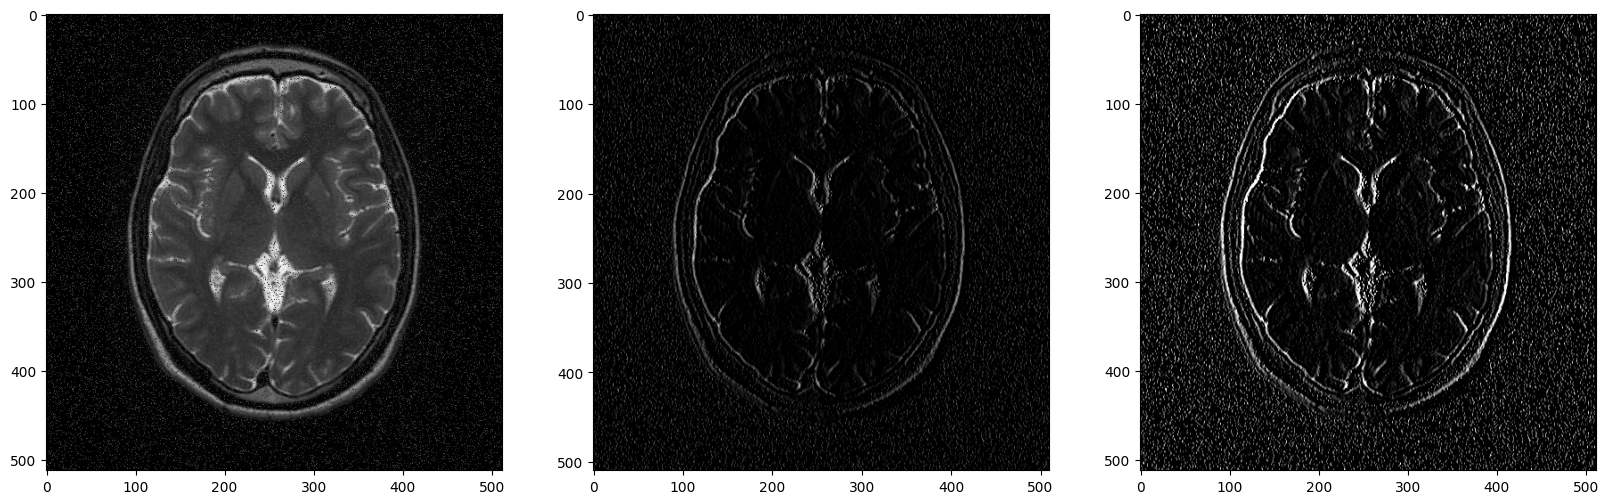

In [68]:
brain = cv2.imread('./cvImages/noisy_brain_MR.jpg')
brain = cv2.cvtColor(brain, cv2.COLOR_BGR2RGB)
brain = cv2.cvtColor(brain, cv2.COLOR_RGB2GRAY)

sobelx = np.array([[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]])

brain_sobelx = convolution(brain, sobelx)
brain_sobelx[brain_sobelx < 0] = 0

brain_sobelx_cv2 = cv2.filter2D(brain, -1, sobelx)

f, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (20,10))
ax1.imshow(brain, cmap = 'gray')
ax2.imshow(brain_sobelx, cmap = 'gray')
ax3.imshow(brain_sobelx_cv2, cmap = 'gray')

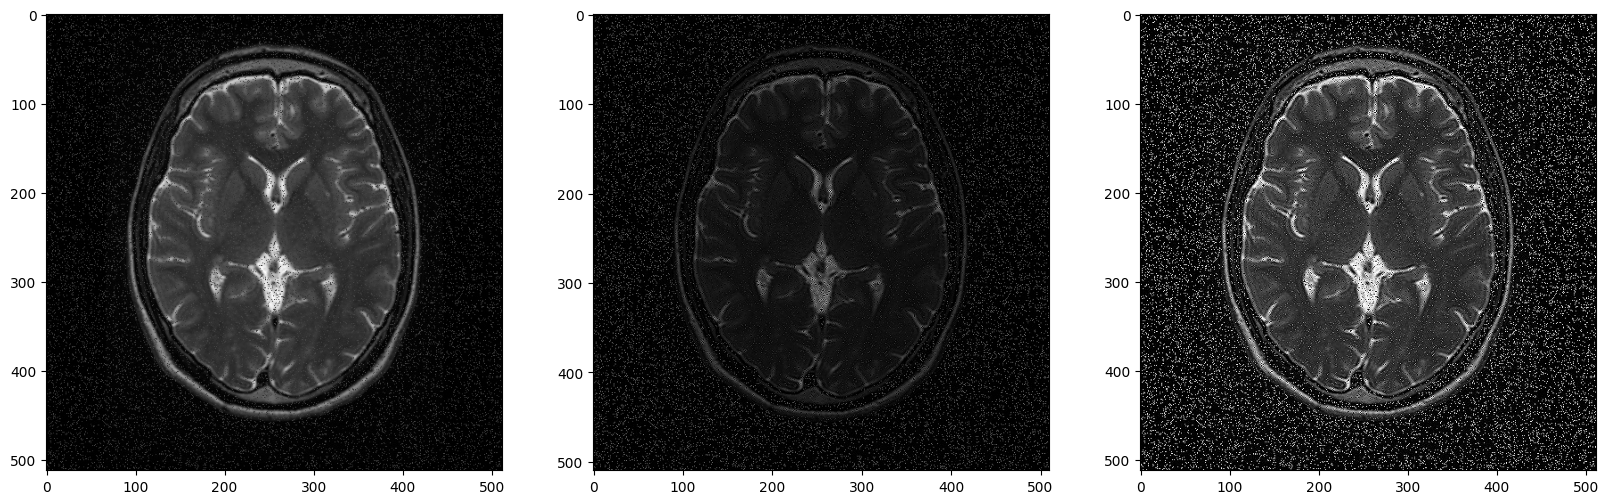

In [76]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

brain_sharpened = convolution(brain, sharpen)
brain_sharpened[brain_sharpened < 0] = 0
brain_sharpened_cv2 = cv2.filter2D(brain, -1, sharpen)

f, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (20,10))
ax1.imshow(brain, cmap = 'gray')
ax2.imshow(brain_sharpened, cmap = 'gray')
ax3.imshow(brain_sharpened_cv2, cmap = 'gray')
